# Importing Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Reading the Data from the CSV file

In [101]:
diabetes_df = pd.read_csv("C:\\Users\\Amit\\Downloads\\diabetes.csv")


In [102]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis(EDA)

In [103]:
# total number of columns in the dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [104]:
# Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [105]:
# To know more about the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
# To know more about the dataset with Transpose to view all columns vertically
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [107]:
# Checking if there is some null values or not where 'False' indicates No Missing value
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [108]:
# Checking if there is some null values or not with the sum of Null values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Visualizing the Data

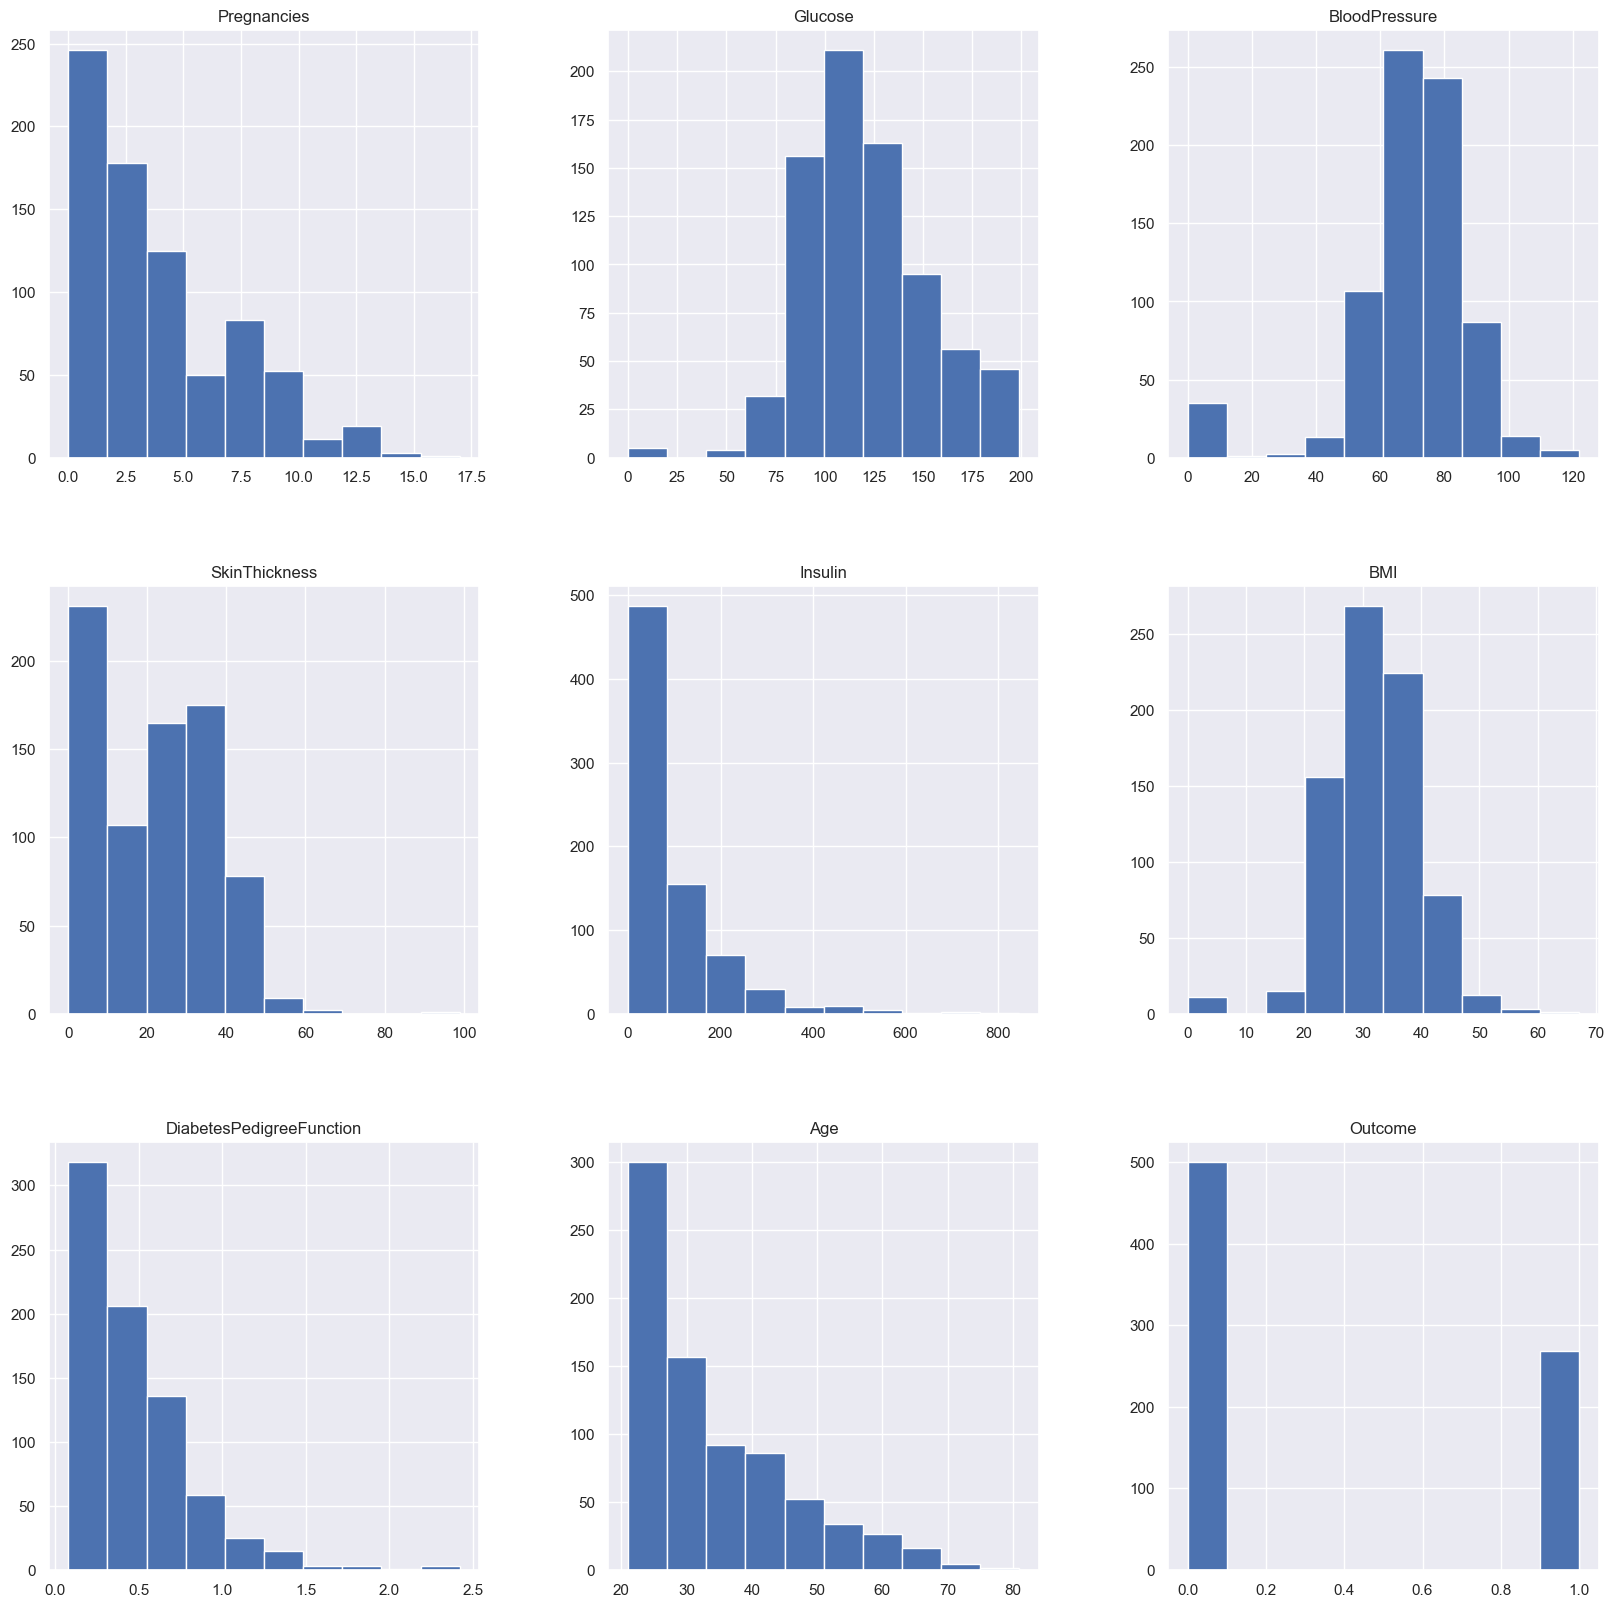

In [110]:
# Plotting the data distribution plots
p = diabetes_df.hist(figsize = (20,20))
plt.show()

In [111]:
# Need to input NAN values for the columns in accordance with their distribution
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace = True)

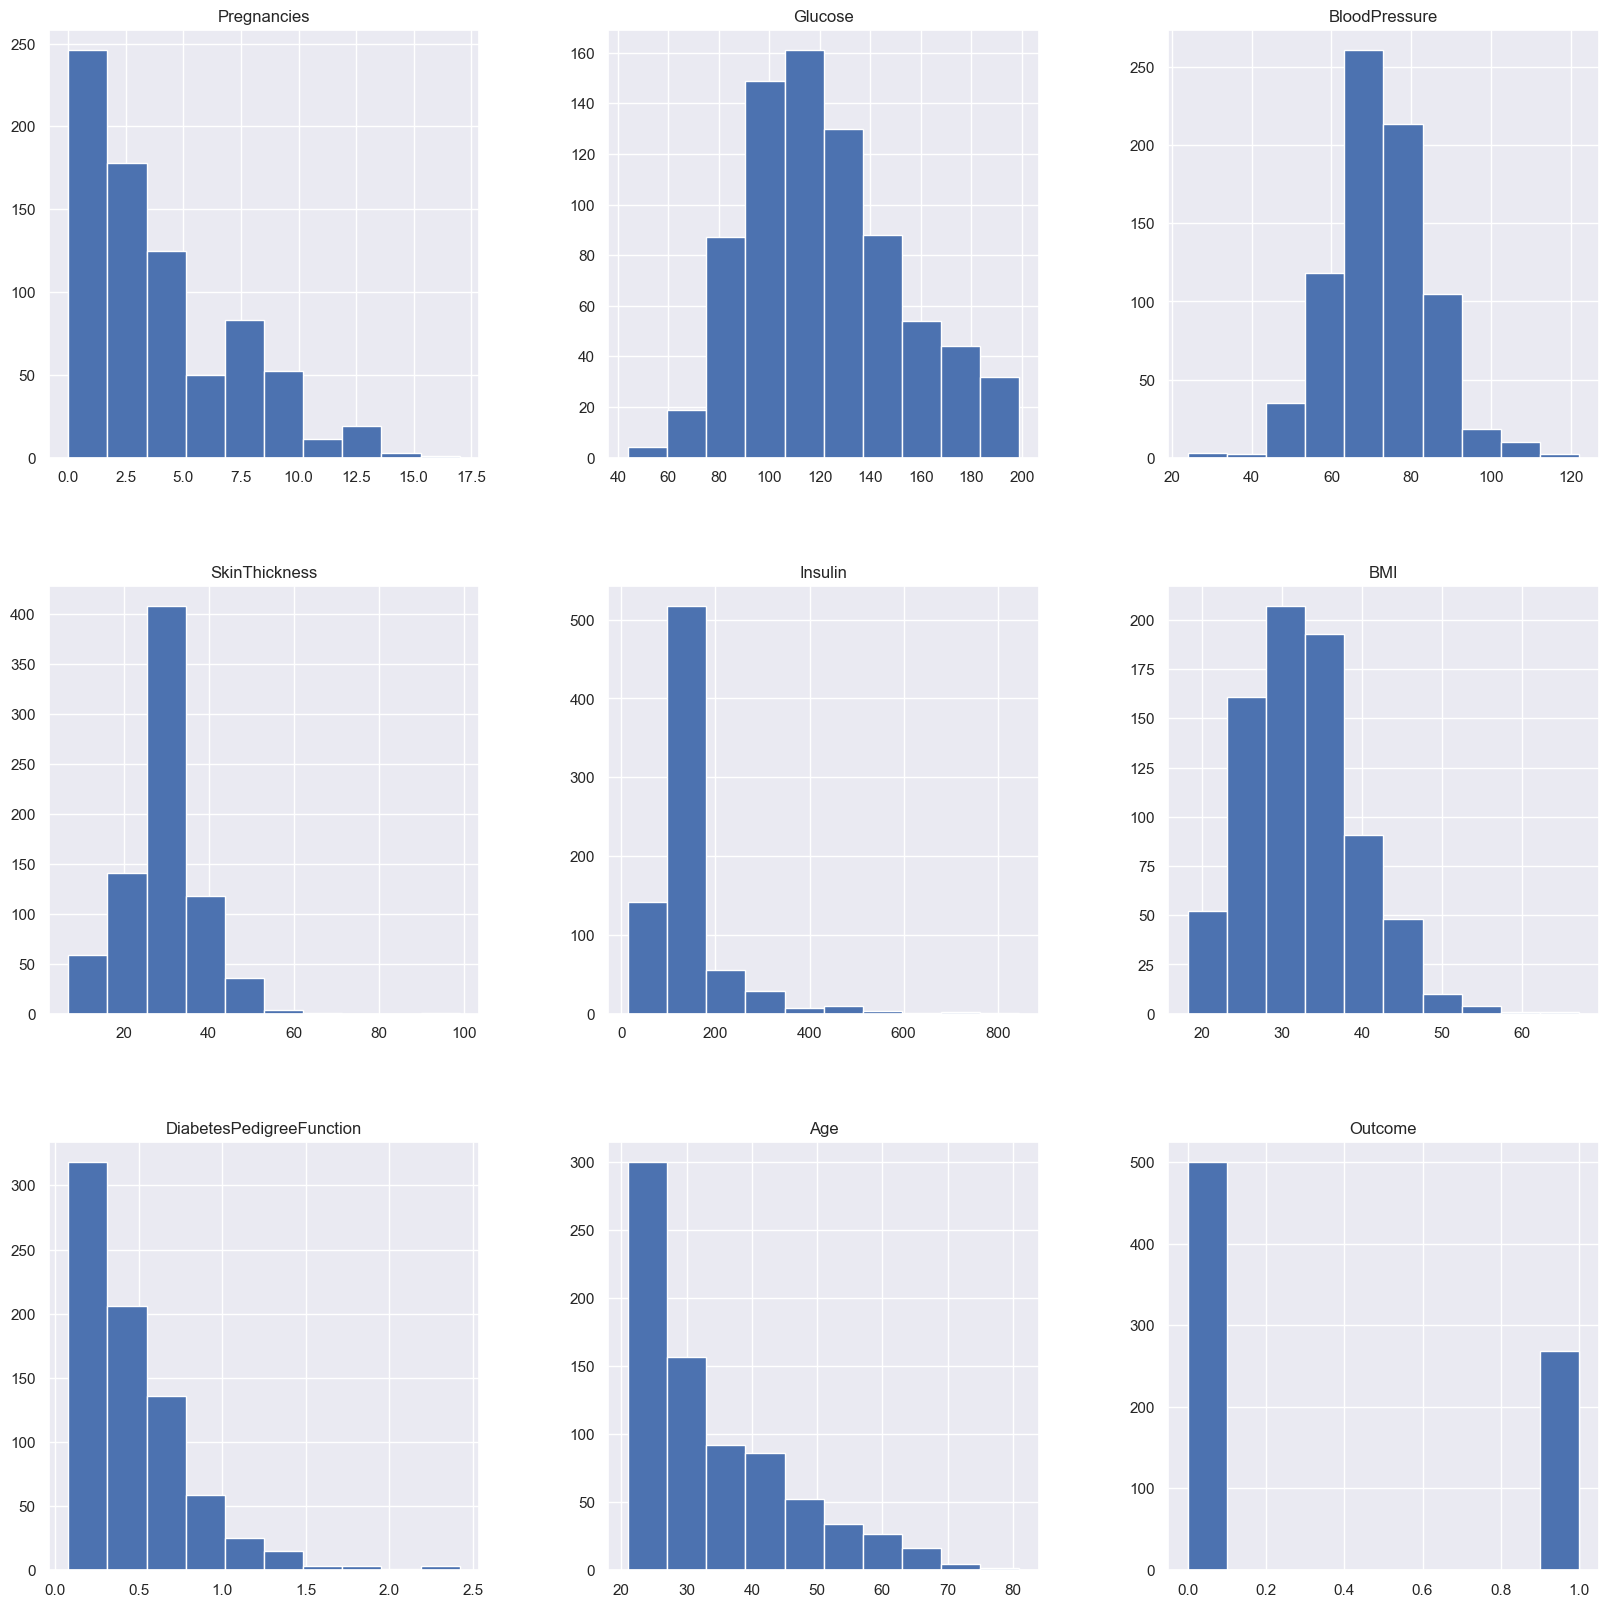

In [112]:
# Plotting the data distribution again after replacing the NAN values with the column's Mean/Median
p = diabetes_df_copy.hist(figsize = (20,20))
plt.show()

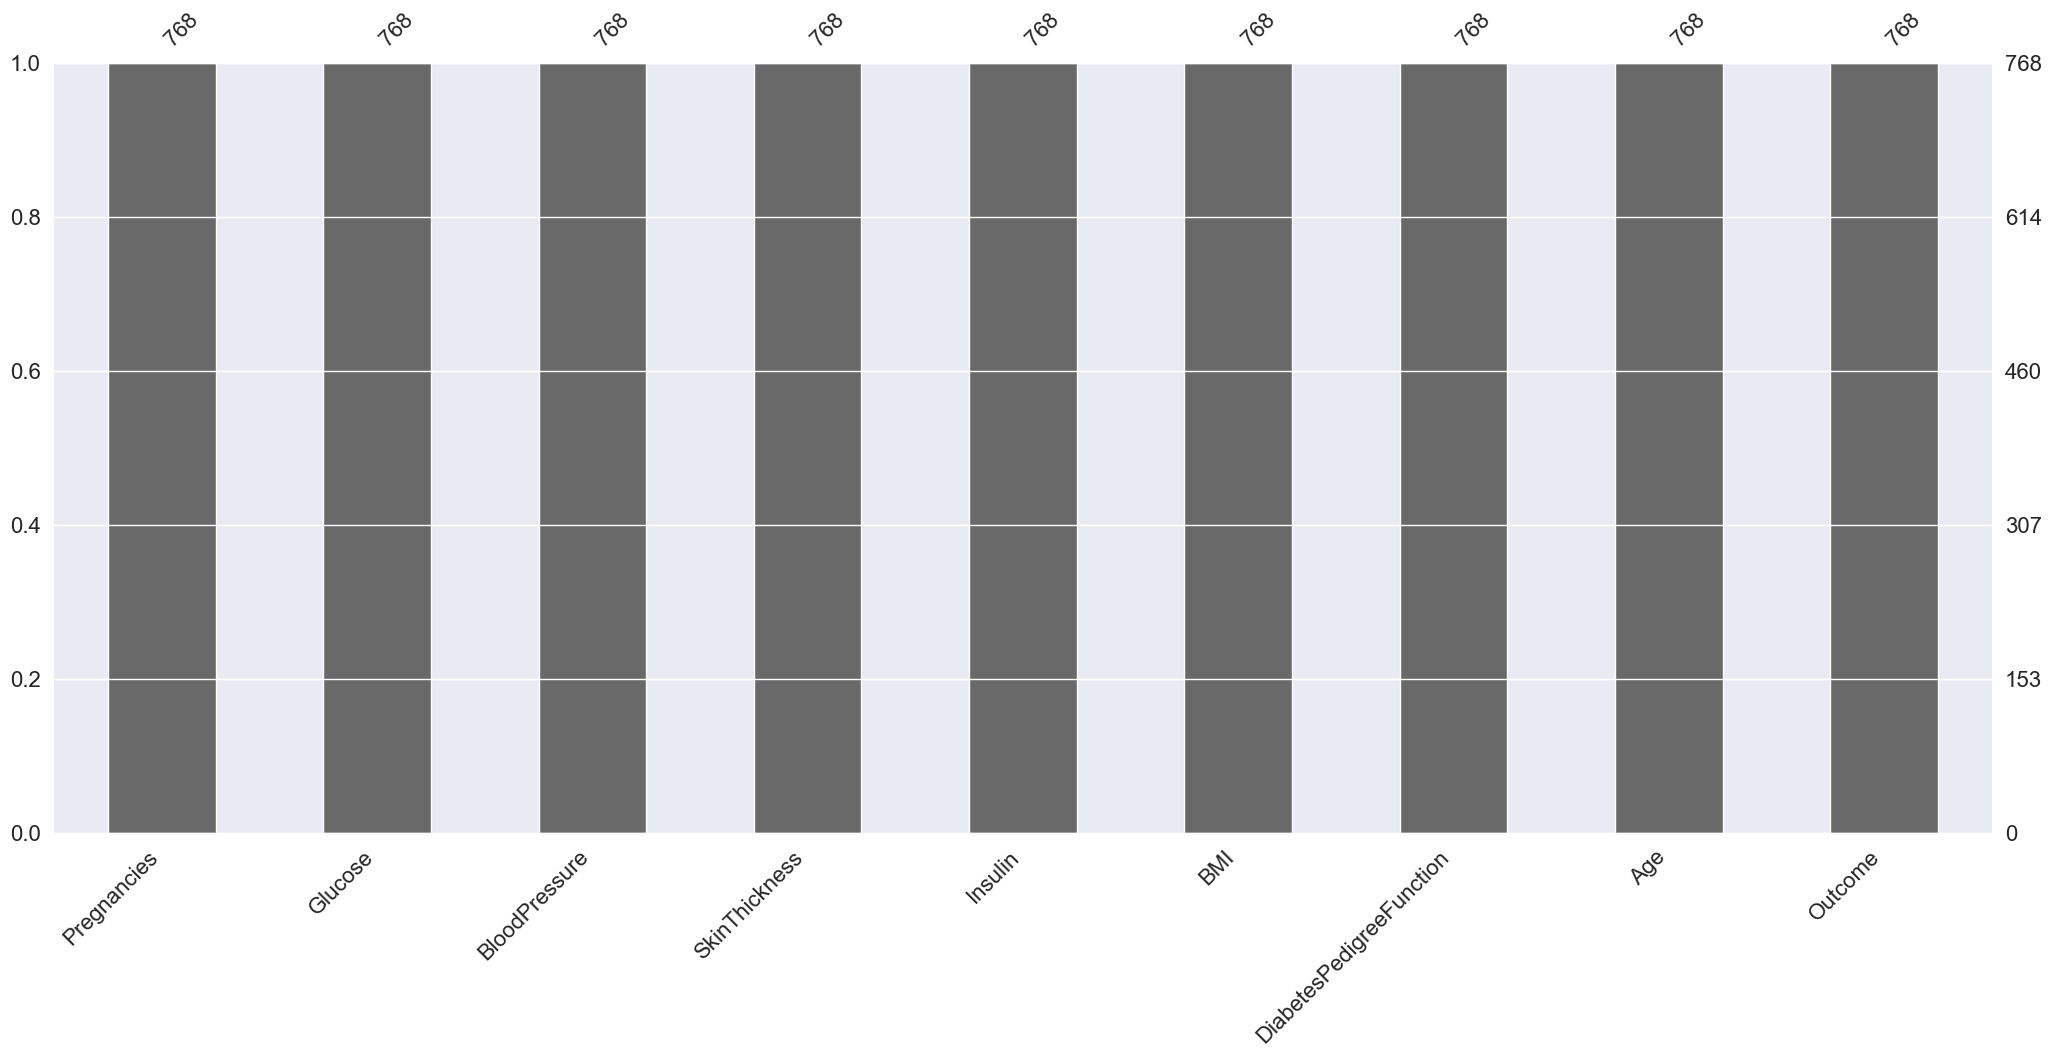

In [113]:
# Plotting the Null count analysis of the Plot
p = msno.bar(diabetes_df)
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


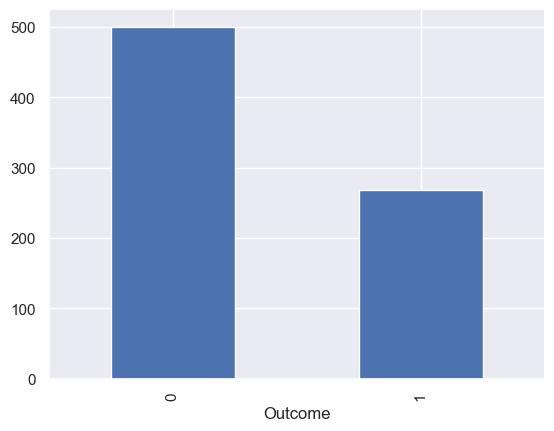

In [114]:
# Checking the balance of the data by plotting the count of outcomes by their value counts

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")
plt.show()

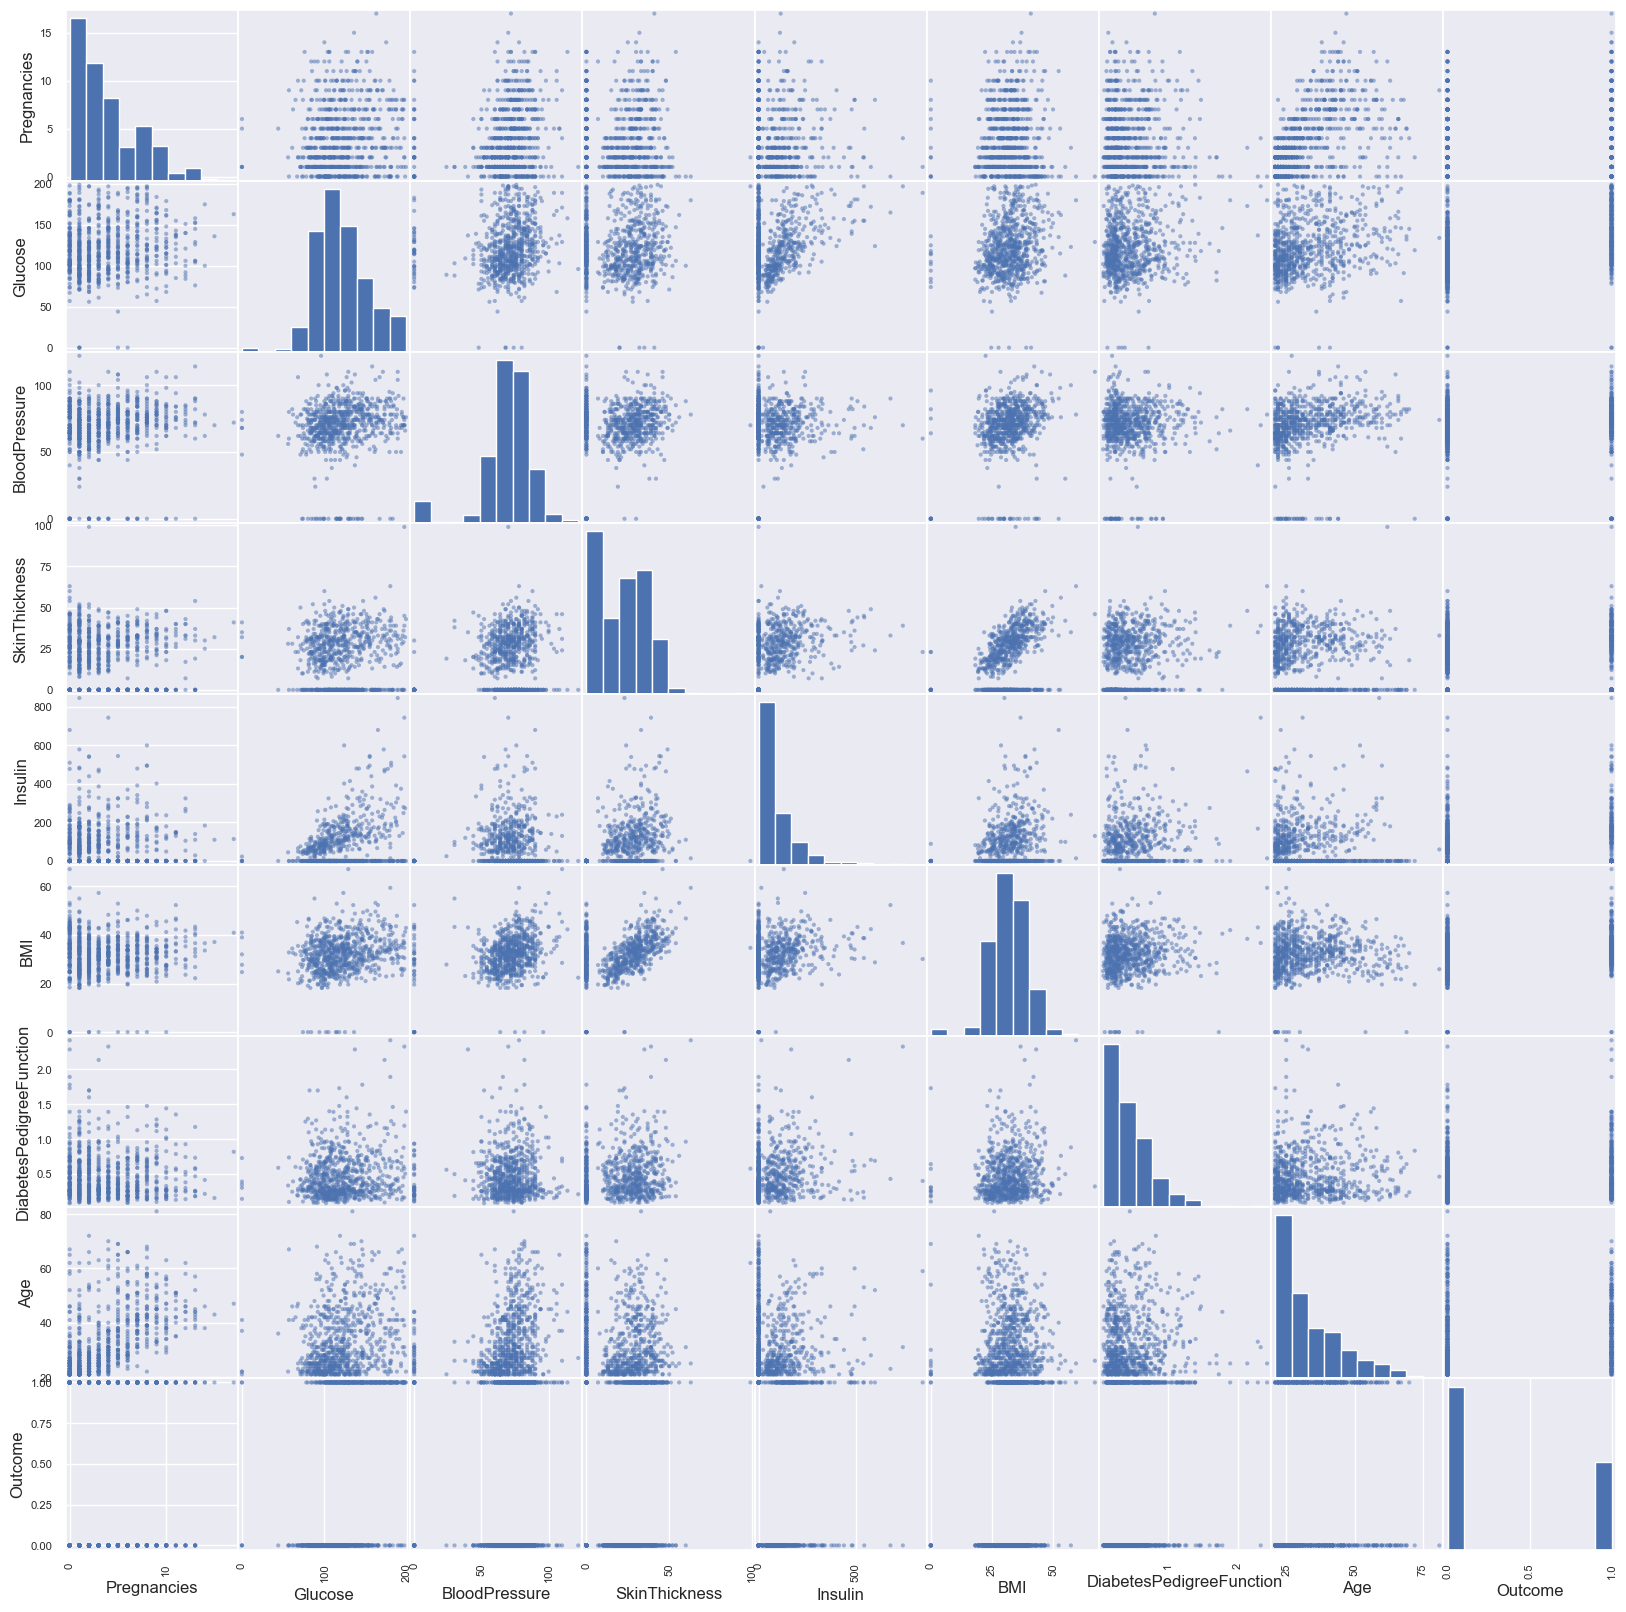

In [115]:
# Plotting a Scatter matrix of uncleaned data
p= scatter_matrix(diabetes_df, figsize=(20,20))
plt.show()

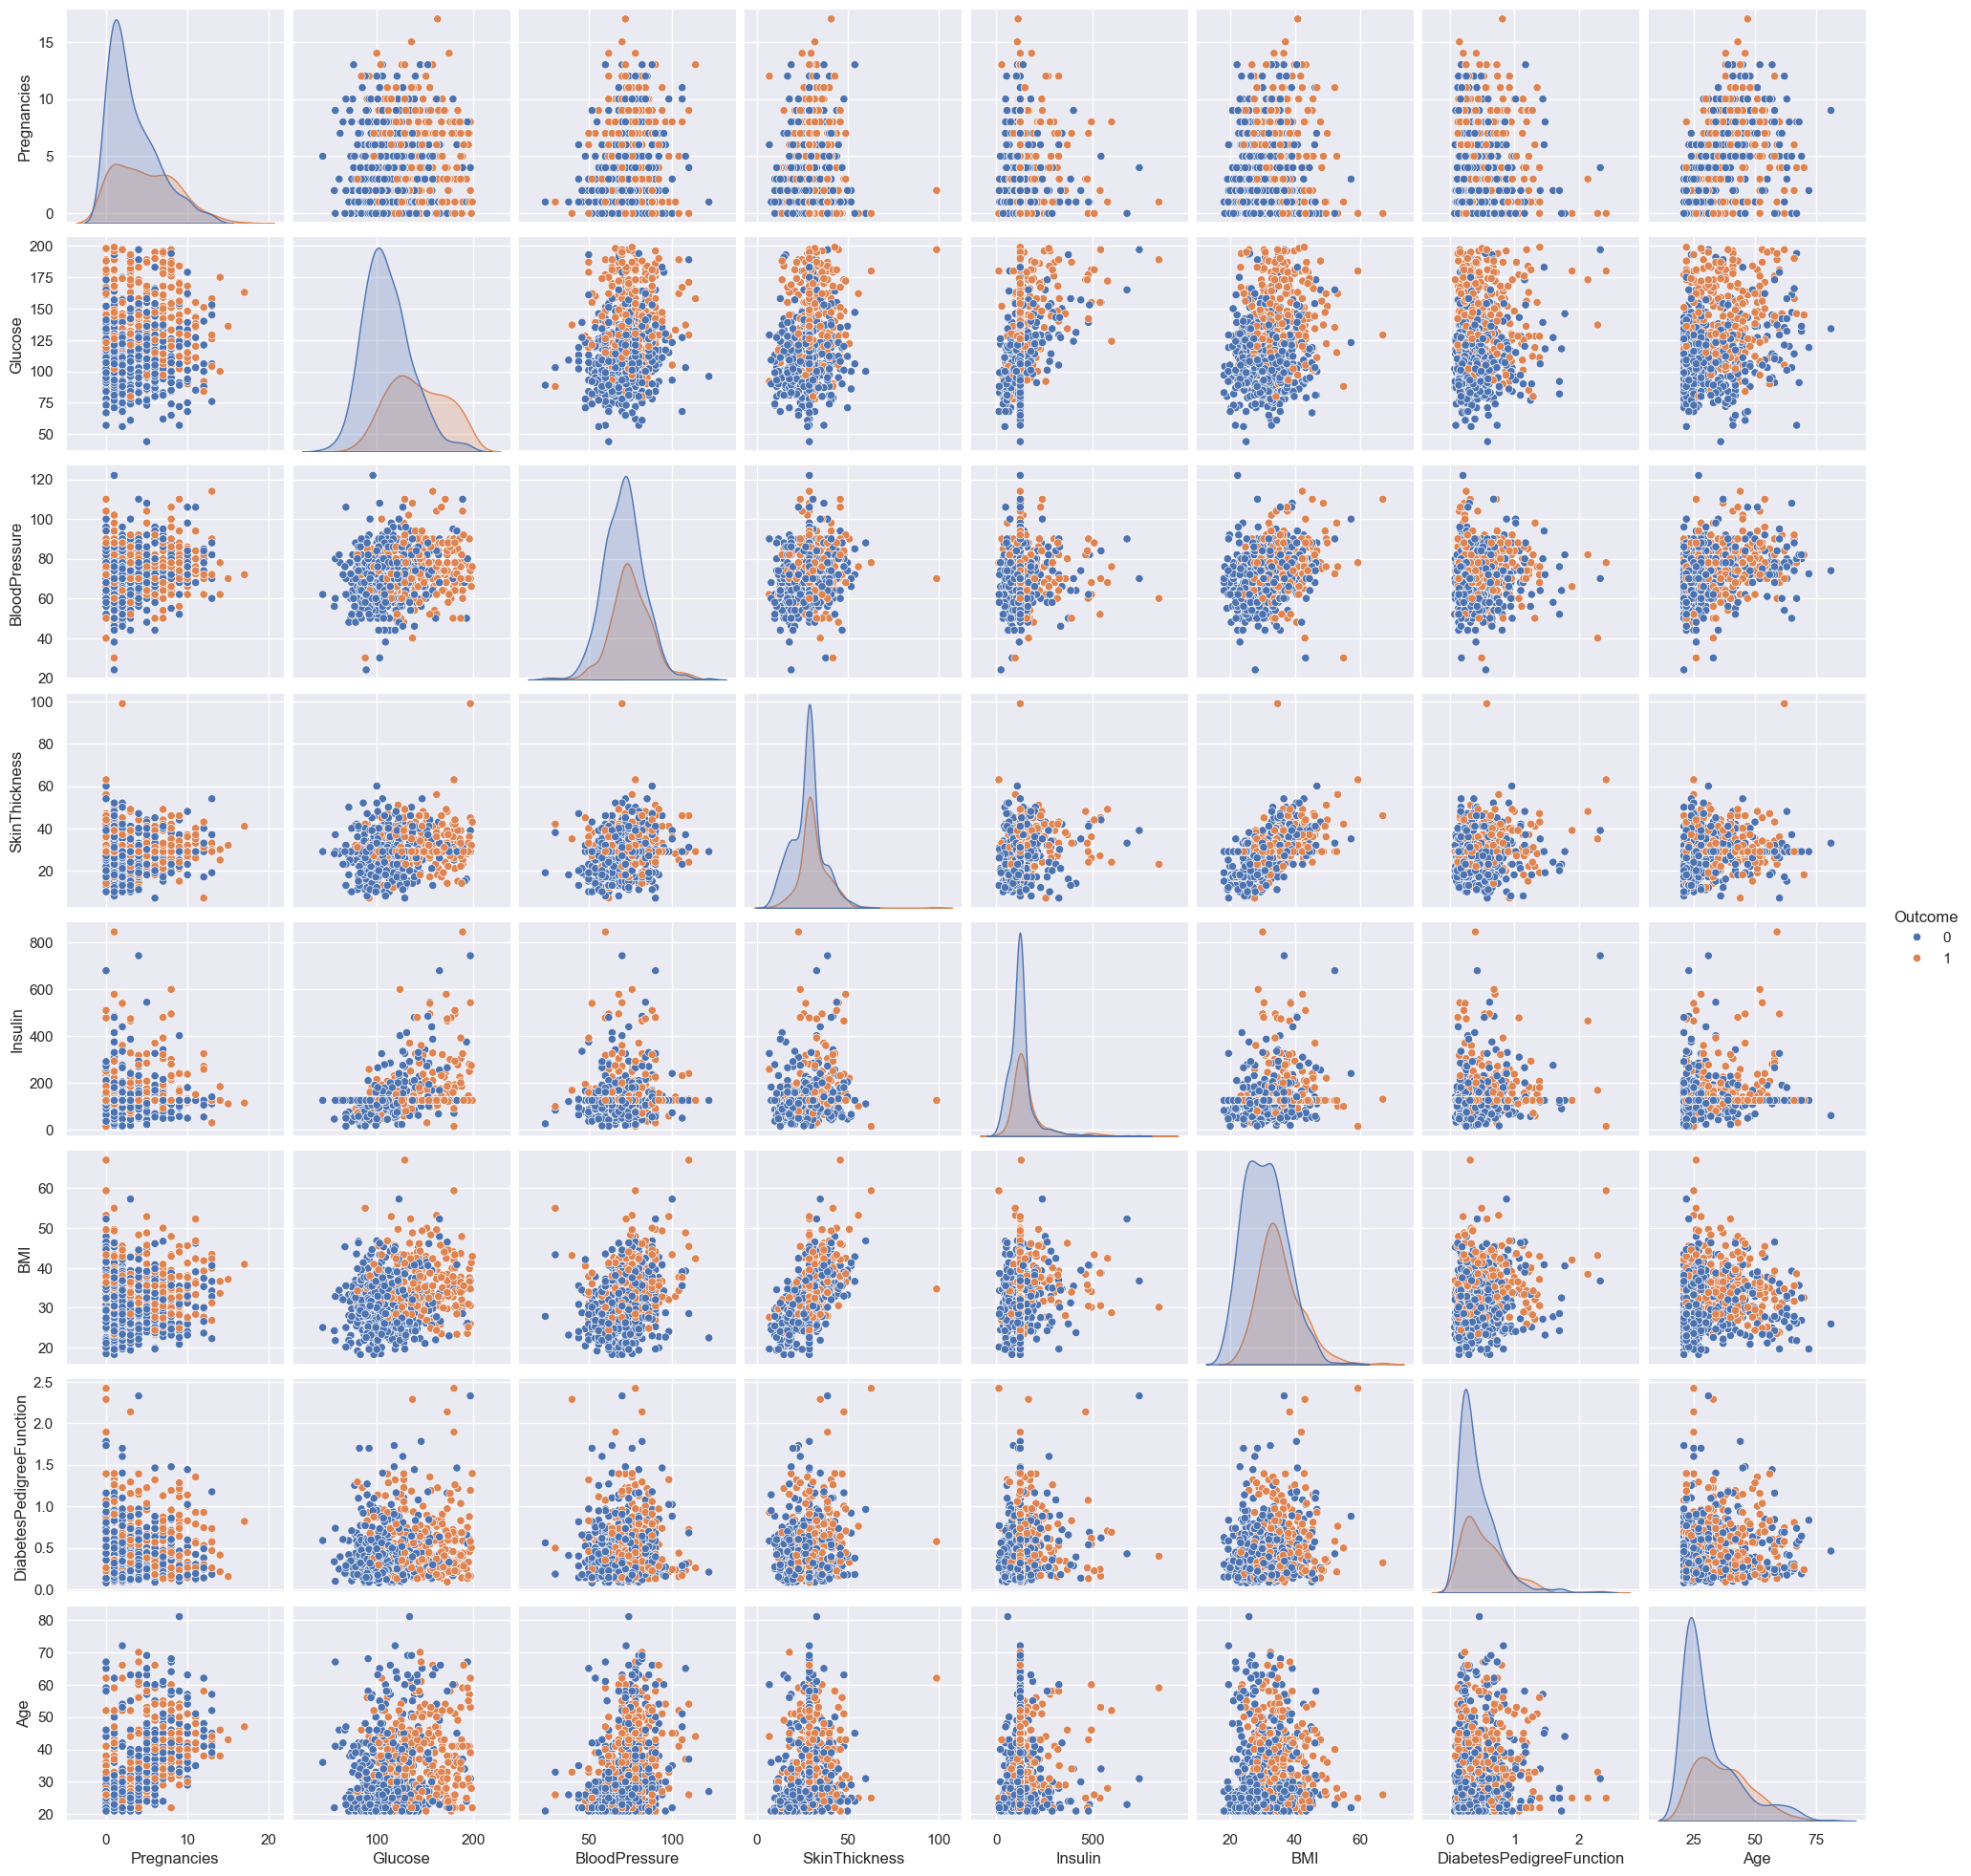

In [116]:
# Plotting the pair plots for the data
p= sns.pairplot(diabetes_df_copy, hue = 'Outcome')
plt.show()

# Correlation Between the features

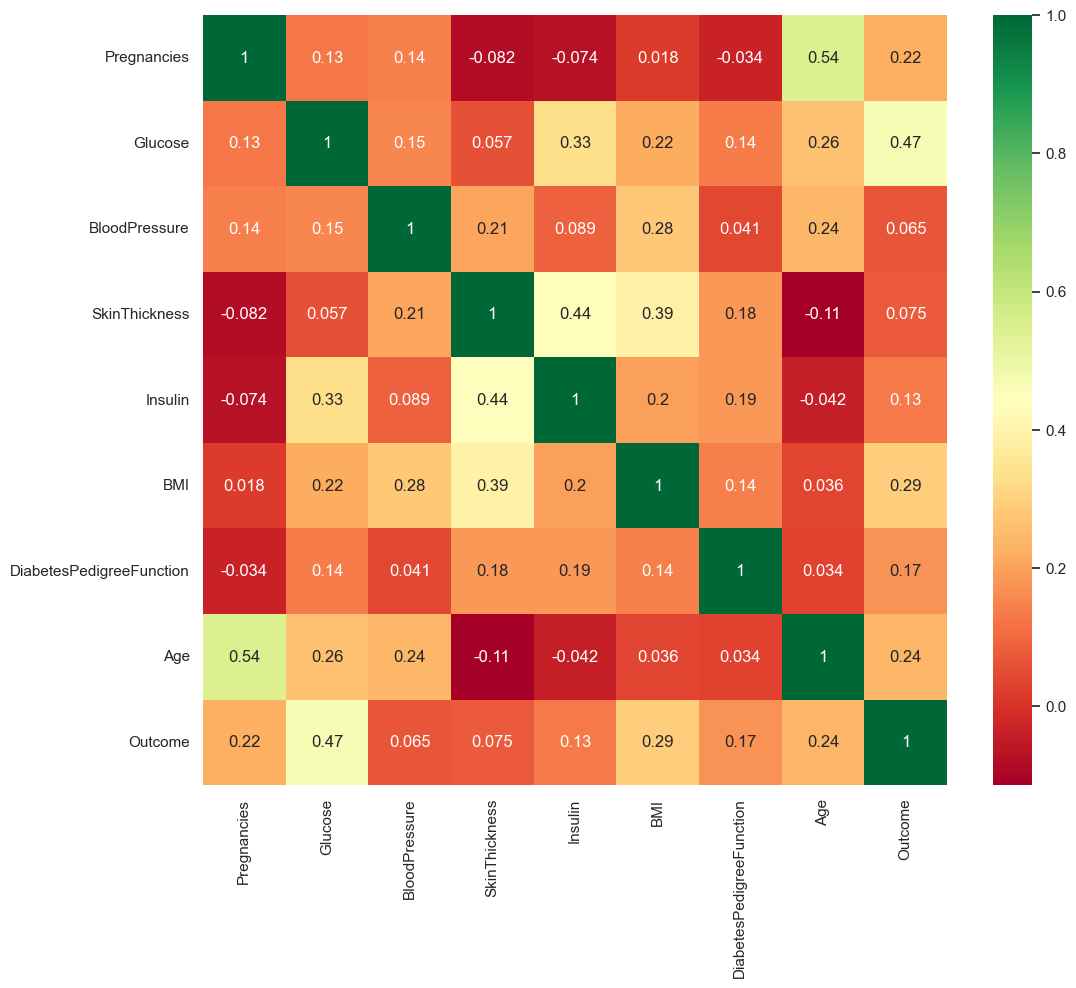

In [117]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

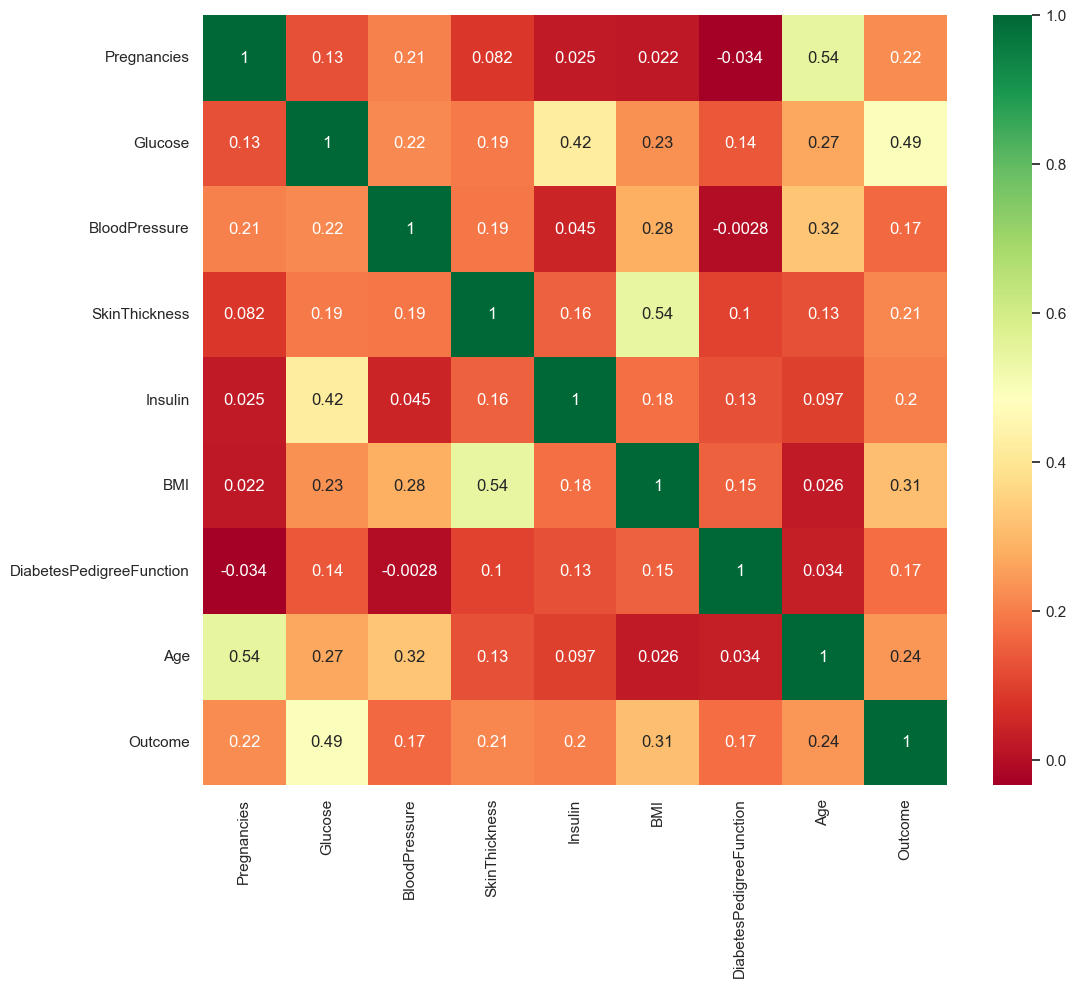

In [118]:
# correlation between all the features after cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df_copy.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

# Scaling the Data

In [119]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [121]:
sc_x = StandardScaler()
D = pd.DataFrame(sc_x.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
D.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [122]:
dc = diabetes_df_copy.Outcome

In [123]:
dc

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the Data into Train and Test

In [124]:
D_train,D_test,dc_train,dc_test = train_test_split(D,dc,test_size = 1/3, random_state = 42, stratify = dc)

In [125]:
D_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
657,-0.844885,-0.055456,0.628269,2.150354,0.687250,0.937686,2.084255,0.660206
462,1.233880,-1.567812,-0.198965,1.239762,-1.061917,0.413720,0.704061,0.490030
171,0.639947,0.404826,-0.198965,-0.695245,-0.123622,0.428275,0.211782,-0.360847
210,-0.547919,-1.337671,-1.026200,-0.809069,-0.181541,-0.692430,-0.549288,-0.701198
147,-0.547919,-0.515738,-0.695306,0.670643,-0.251045,-0.284901,2.803044,0.064591
...,...,...,...,...,...,...,...,...
113,0.046014,-1.502057,-0.860753,-0.012301,-0.181541,0.224510,-0.244256,-0.701198
556,-0.844885,-0.811634,-0.198965,1.239762,-0.181541,0.821249,-0.766737,-0.275760
254,2.421746,-0.976020,-0.860753,-2.516429,1.359116,-0.706985,1.371507,0.915469
647,-1.141852,1.884304,-1.853434,0.784467,0.212311,0.777585,-0.050968,-0.956462


In [126]:
D_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
52,0.342981,-1.107530,-0.529859,-0.922893,-1.363098,-1.172733,-0.392242,-0.275760
64,0.936914,-0.252720,-0.529859,-0.012301,-0.181541,0.049855,-0.645932,0.745293
630,0.936914,-0.252720,-0.695306,-0.012301,-0.181541,-0.736094,0.785604,0.064591
707,-0.547919,0.174685,-2.184328,-0.922893,2.251075,0.282729,-0.893582,-0.956462
330,1.233880,-0.121211,-0.033518,-1.150541,-0.181541,-1.361943,3.032573,1.085644
...,...,...,...,...,...,...,...,...
33,0.639947,-0.976020,1.620951,-0.012301,-0.181541,-1.827690,-0.857340,-0.445935
596,-1.141852,-1.797953,0.297376,-0.012301,-0.181541,1.869181,-0.839219,1.085644
88,3.312645,0.470581,-0.198965,0.329171,-0.355300,0.675703,-0.963044,0.830381
679,-0.547919,-0.680125,-1.191647,-1.378189,1.440203,-1.201842,0.429230,-0.871374


In [127]:
dc_train

657    0
462    0
171    1
210    0
147    0
      ..
113    0
556    0
254    1
647    1
107    0
Name: Outcome, Length: 512, dtype: int64

In [128]:
dc_test

52     0
64     1
630    1
707    0
330    0
      ..
33     0
596    0
88     1
679    0
112    0
Name: Outcome, Length: 256, dtype: int64

# 

# Model Building and Training

## K-Nearest Neighbor (KNN)

In [129]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(D_train,dc_train)
    
    train_scores.append(knn.score(D_train,dc_train))
    test_scores.append(knn.score(D_test,dc_test))

In [130]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.80078125,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [131]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [132]:

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Maximum Train Score is {} % at K = {}".format(max_train_score*100,list(map(lambda x: x+1,train_scores_ind))))

Maximum Train Score is 100.0 % at K = [1]


In [133]:
### score that comes from testing on the datapoint that were split in the beginning to be used for testing solely for evaluating the model
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Maximum Test Score is {} % at K = {}".format(max_test_score*100,list(map(lambda x: x+1,test_scores_ind))))


Maximum Test Score is 76.5625 % at K = [11]


<Axes: >

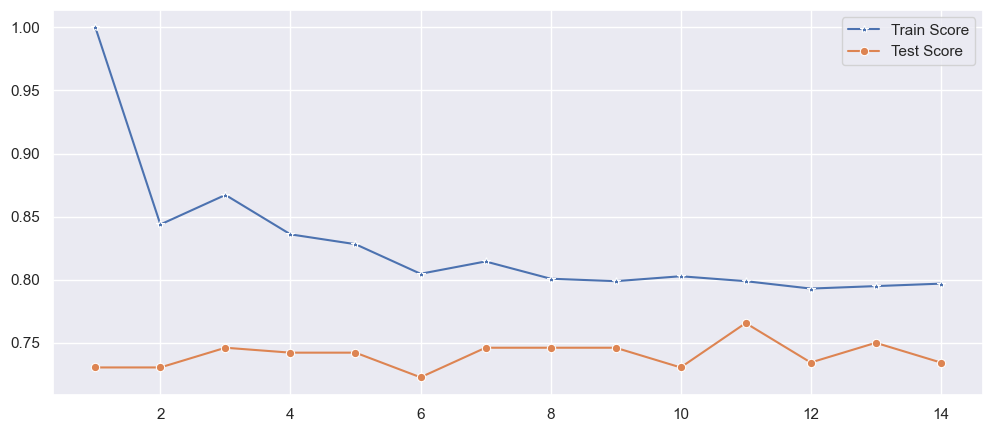

In [134]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores,  marker='o', label='Test Score')

The best result is captured at k = 11 hence 11 is used for the final model

In [135]:
knn = KNeighborsClassifier(11)
knn.fit(D_train,dc_train)
knn.score(D_test,dc_test)

0.765625

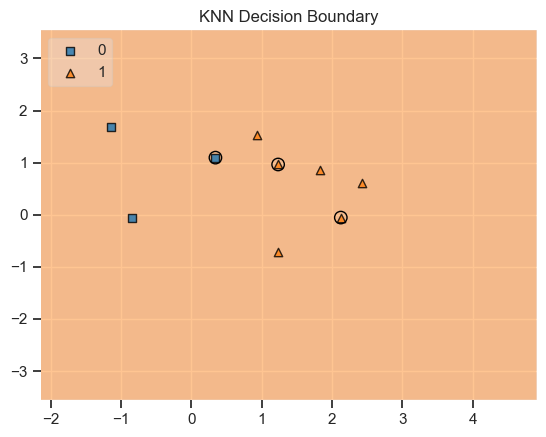

In [136]:
# Plot the Decision Boundary for K=11

value = 20000
width = 20000
plot_decision_regions(D.values, dc.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=D_test.values)

plt.title("KNN Decision Boundary")
plt.show()

## Confusion Matrix

Text(0.5, 20.049999999999997, 'Predicted label')

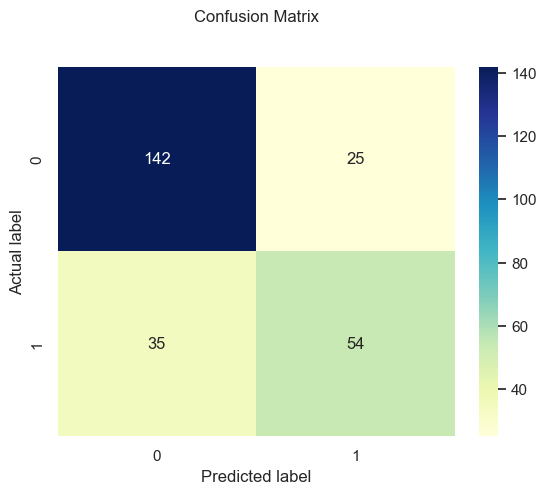

In [137]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(D_test)

cnf_matrix = confusion_matrix(dc_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [138]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(dc_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## ROC-AUC Curve

In [139]:
from sklearn.metrics import roc_curve

y_pred_prob = knn.predict_proba(D_test)[:,1]
fpr, tpr, thresholds = roc_curve(dc_test, y_pred_prob)

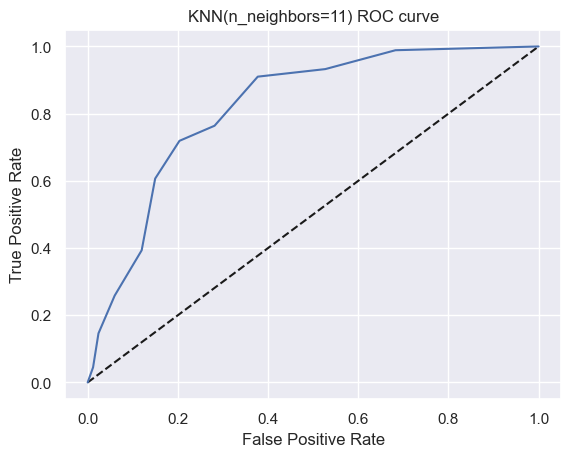

In [140]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(dc_test, y_pred_prob)

0.8198883132611182

## Implementing GridSearchCV

In [ ]:
# In case of Classifier like KNN the parameter to be tuned is 'n_neighbors' which is equivalent to 'K' in KNN.
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(D, dc)

print("Best K value: " + str(knn_cv.best_score_))
best_k = int(knn_cv.best_params_['n_neighbors'])
print("Best Parameters:", {'n_neighbors': best_k})

Best K value: 0.7708853238265002
Best Parameters: {'n_neighbors': 28}
